# Error and structure for a generation from Kirby, Cornish & Smith (2008)

This notebook works out *error* and *structure* for an example generation in the KCS paper. It assumes there is a CSV file called `language.csv` that has the language we're calculating structure on, and a file `languages.csv` that has the *two* languages (input and output essentially) that we're calculating the error on. You'll need to make sure you get your input files in the right format to run these measures on.

## Setup

First load three packages (and install them if necessary). `stringdist`, which has various measures of string distance (we'll be using levenshtein string edit distance), `vegan`, which allows us to use the Mantel test to compute the significance of a correlation of two sets of distances between points (here, the "points" are meanings on the one hand, and signals on the other), and `ggplot2` to plot the graphs.

In [14]:
if (!require(vegan)) {install.packages("vegan"); library(vegan)}
if (!require(stringdist)) {install.packages("stringdist"); library(stringdist)}
if (!require(ggplot2)) {install.packages("ggplot2"); library(ggplot2)}

## Calculating error

First let's calculate the error between an input language and an output language. The spreadsheet needs two columns of strings only, one headed `input` the other `output`.

In [15]:
languages <- read.csv("languages.csv", as.is=TRUE)
languages

input,output
rehopilu,rehepilu
laneplo,laneplo
lahoplo,lareplo
nepilu,nerepilu
renana,renana
rahoplo,rekiplo
reneki,reneki
replo,reneplo
lakeki,lakiki
nereki,nereki


We need the distances between each input string and its corresponding output string, which we're calculating using the levenshtein distance method (how many insertions, deletions or replacements would you need to take you from one string to the other).

In [16]:
distances <- stringdist(languages$input, languages$output, method="lv")
distances

[1] 1 0 2 2 0 3 0 2 1 0 0 3 3 0 2 3 2 0 3 2 3 0 3 2 2 2 0

Now we'll *normalise* this so that the maximum distance is 1. We do this by dividing the edit distance by the number of characters in the longest string.

In [17]:
max_lengths <- mapply(max, nchar(languages$input), nchar(languages$output))
normalised <- distances / max_lengths
normalised

[1] 0.1250000 0.0000000 0.2857143 0.2500000 0.0000000 0.4285714 0.0000000
 [8] 0.2857143 0.1666667 0.0000000 0.0000000 0.5000000 0.4285714 0.0000000
[15] 0.3333333 0.5000000 0.2500000 0.0000000 0.5000000 0.2857143 0.3750000
[22] 0.0000000 0.3750000 0.3333333 0.2500000 0.2500000 0.0000000

The overall error is simply the average of all the errors between input and output.

In [18]:
mean(normalised)

[1] 0.2193563

## Calculate structure

Now our input is a single language, but we need to know not only the signals but also the meanings.

In [19]:
language <- read.csv("language.csv", as.is=TRUE)
language

meanings,signals
scr,rehopilu
bsb,laneplo
bcb,lahoplo
ssk,nepilu
hsr,renana
btr,rahoplo
hcr,reneki
bsr,replo
htb,lakeki
hsk,nereki


We create a meaning distance matrix made up of the distances between pairs of meanings calculated using *hamming distance*. This is simply the number of "slots" in the meaning that are different between the pair of meanings. To make this work, you need the `meanings` column of the spreadsheet to be coded in such a way that each meaning is given a code using a single letter.

In [20]:
meaning_dists <- as.matrix(stringdistmatrix(language$meanings, method="hamming"))
meaning_dists

,1,2,3,4,5,6,7,8,9,10,⋯,18,19,20,21,22,23,24,25,26,27
1,0,3,2,2,2,2,1,2,3,3,⋯,3,3,1,1,2,1,3,2,1,3
2,3,0,1,2,2,2,3,1,2,2,⋯,2,3,2,3,2,3,1,3,2,1
3,2,1,0,3,3,2,2,2,2,3,⋯,2,3,1,2,2,3,2,3,1,2
4,2,2,3,0,2,3,3,2,3,1,⋯,2,2,3,1,2,2,2,1,2,1
5,2,2,3,2,0,2,1,1,2,1,⋯,3,2,2,3,3,2,1,3,3,2
6,2,2,2,3,2,0,2,1,2,3,⋯,1,2,1,3,2,1,3,2,3,2
7,1,3,2,3,1,2,0,2,2,2,⋯,3,2,1,2,3,2,2,3,2,3
8,2,1,2,2,1,1,2,0,3,2,⋯,2,3,1,3,3,2,2,3,3,1
9,3,2,2,3,2,2,2,3,0,2,⋯,2,1,3,3,1,2,1,2,2,3
10,3,2,3,1,1,3,2,2,2,0,⋯,2,1,3,2,3,3,1,2,3,1


Now we do the same for all pairs of signals within the language, but using our levenshtein distance as before.

In [21]:
signal_dists <- as.matrix(stringdistmatrix(language$signals, method="lv"))
signal_dists

,1,2,3,4,5,6,7,8,9,10,⋯,18,19,20,21,22,23,24,25,26,27
1,0,6,4,3,6,3,5,4,7,6,⋯,5,6,2,1,4,1,6,3,2,5
2,6,0,2,4,6,3,5,3,4,6,⋯,4,6,4,6,4,5,5,6,4,3
3,4,2,0,6,7,1,7,4,5,7,⋯,4,7,2,4,4,3,6,6,2,4
4,3,4,6,0,5,6,5,3,6,4,⋯,3,4,5,2,4,4,5,2,4,4
5,6,6,7,5,0,6,3,4,6,5,⋯,6,5,5,7,8,7,5,7,8,6
6,3,3,1,6,6,0,6,3,6,7,⋯,4,7,1,4,5,2,7,6,3,4
7,5,5,7,5,3,6,0,4,3,2,⋯,5,2,5,6,7,6,2,6,7,5
8,4,3,4,3,4,3,4,0,6,5,⋯,3,5,2,5,6,5,5,5,6,2
9,7,4,5,6,6,6,3,6,0,3,⋯,6,2,7,7,4,6,2,6,5,6
10,6,6,7,4,5,7,2,5,3,0,⋯,5,1,6,5,7,7,1,5,7,3


I'm going to normalise this again so that the maximum distance is 1. (I'm actually not 100% sure whether this normalisation step is required - but I'm keeping it here for consistency.)

In [22]:
for (r in 1:nrow(signal_dists)) 
  for (c in 1:ncol(signal_dists)) 
    signal_dists[r,c] <- signal_dists[r,c] / max(nchar(language$signals[r]), nchar(language$signals[c]))
signal_dists

,1,2,3,4,5,6,7,8,9,10,⋯,18,19,20,21,22,23,24,25,26,27
1,0.000,0.7500000,0.5000000,0.3750000,0.7500000,0.3750000,0.6250000,0.5000000,0.8750000,0.7500000,⋯,0.6250000,0.7500000,0.2500000,0.125,0.500,0.125,0.7500000,0.375,0.250,0.6250000
2,0.750,0.0000000,0.2857143,0.5714286,0.8571429,0.4285714,0.7142857,0.4285714,0.5714286,0.8571429,⋯,0.5714286,0.8571429,0.5714286,0.750,0.500,0.625,0.7142857,0.750,0.500,0.4285714
3,0.500,0.2857143,0.0000000,0.8571429,1.0000000,0.1428571,1.0000000,0.5714286,0.7142857,1.0000000,⋯,0.5714286,1.0000000,0.2857143,0.500,0.500,0.375,0.8571429,0.750,0.250,0.5714286
4,0.375,0.5714286,0.8571429,0.0000000,0.8333333,0.8571429,0.8333333,0.5000000,1.0000000,0.6666667,⋯,0.4285714,0.6666667,0.7142857,0.250,0.500,0.500,0.8333333,0.250,0.500,0.5714286
5,0.750,0.8571429,1.0000000,0.8333333,0.0000000,0.8571429,0.5000000,0.6666667,1.0000000,0.8333333,⋯,0.8571429,0.8333333,0.7142857,0.875,1.000,0.875,0.8333333,0.875,1.000,0.8571429
6,0.375,0.4285714,0.1428571,0.8571429,0.8571429,0.0000000,0.8571429,0.4285714,0.8571429,1.0000000,⋯,0.5714286,1.0000000,0.1428571,0.500,0.625,0.250,1.0000000,0.750,0.375,0.5714286
7,0.625,0.7142857,1.0000000,0.8333333,0.5000000,0.8571429,0.0000000,0.6666667,0.5000000,0.3333333,⋯,0.7142857,0.3333333,0.7142857,0.750,0.875,0.750,0.3333333,0.750,0.875,0.7142857
8,0.500,0.4285714,0.5714286,0.5000000,0.6666667,0.4285714,0.6666667,0.0000000,1.0000000,0.8333333,⋯,0.4285714,0.8333333,0.2857143,0.625,0.750,0.625,0.8333333,0.625,0.750,0.2857143
9,0.875,0.5714286,0.7142857,1.0000000,1.0000000,0.8571429,0.5000000,1.0000000,0.0000000,0.5000000,⋯,0.8571429,0.3333333,1.0000000,0.875,0.500,0.750,0.3333333,0.750,0.625,0.8571429
10,0.750,0.8571429,1.0000000,0.6666667,0.8333333,1.0000000,0.3333333,0.8333333,0.5000000,0.0000000,⋯,0.7142857,0.1666667,0.8571429,0.625,0.875,0.875,0.1666667,0.625,0.875,0.4285714


Now we run the Mantel test with 10000 permutations to work out how structured the mapping is. In other word, how non-random is the relationship between the similarity of meanings and the similarity of the strings they are paired with?

In [23]:
structure <- mantel(meaning_dists, signal_dists, permutations=10000)

# the r-value

structure$statistic

# the p-value

structure$signif

# the z-score

perms <- permustats(structure)$permutations
(structure$statistic - mean(perms)) / sd(perms)

[1] 0.6682713

[1] 9.999e-05

[1] 13.06849

It can help us understand what the Mantel test is doing if we look at the distribution of possible random correlations and the real correlation that we've found. A structured language will have a real correlation that's way out in the tail of the distribution. This part is just for your own understanding - you would not show this in a research report!

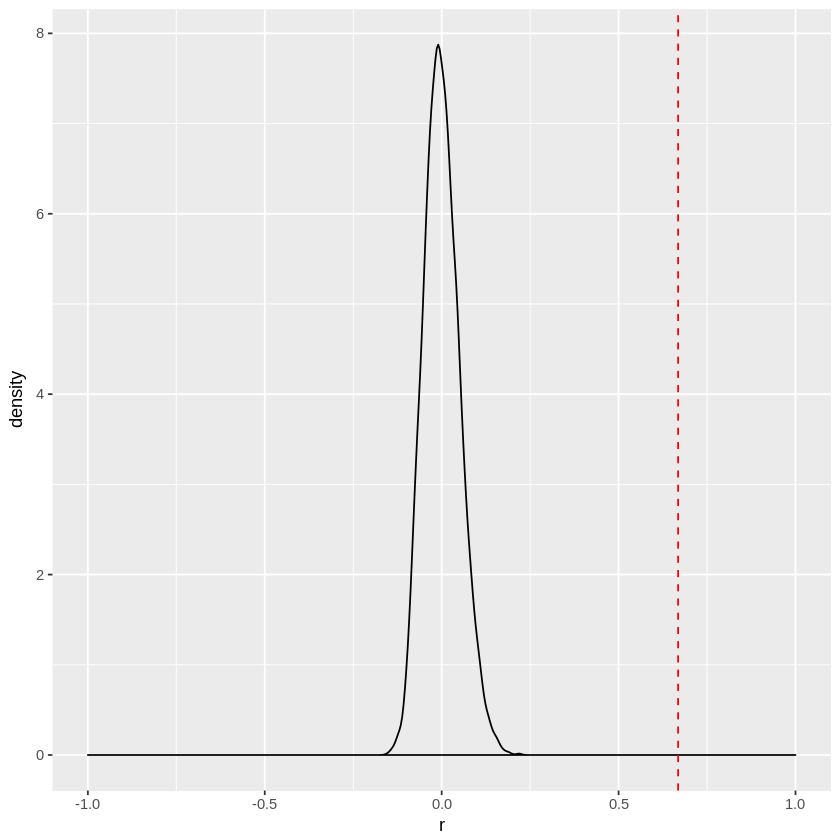

In [24]:
permsdf <- data.frame(r=perms)

ggplot(data=permsdf,aes(r)) + geom_density() + 
  geom_vline(xintercept=structure$statistic, colour='red', linetype='dashed') + xlim(-1,1)